In [66]:
%pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from qutip import Qobj, partial_transpose
import numpy as np

In [27]:
def calculate_frequencies(hh_counts, hv_counts, vh_counts, vv_counts):
    # Stack the counts into a single array
    all_counts = np.stack((hh_counts, hv_counts, vh_counts, vv_counts), axis=0)
    
    # Compute the total sum across all counts
    total_sum = np.sum(all_counts)
    
    # Compute the relative frequencies
    frequencies = all_counts / total_sum
    
    return frequencies

In [30]:
def calculate_v(frequencies):
    # Sum frequencies across polarization states for each angle (column-wise sum)
    summed_frequencies = np.sum(frequencies, axis=0)
    
    # Find max and min values of summed frequencies
    max_freq = np.max(summed_frequencies)
    min_freq = np.min(summed_frequencies)
    
    # Compute V using the given formula
    V = (max_freq - min_freq) / (max_freq + min_freq)
    
    return V

For 0 degress

Frequencies (HH, HV, VH, VV):
[[0.05595185 0.0439144  0.03655818 0.0169416  0.00646456 0.00200624
  0.00624164 0.02518948 0.04168524 0.0481498 ]
 [0.00133749 0.00401248 0.01493535 0.02964779 0.04369148 0.04346857
  0.03856442 0.02474365 0.01003121 0.00178333]
 [0.00111458 0.00178333 0.01493535 0.03009362 0.04592064 0.05171645
  0.05015604 0.0283103  0.01248328 0.00156041]
 [0.04569773 0.04436023 0.0367811  0.01671868 0.00490415 0.00222916
  0.00802497 0.01961658 0.03611235 0.05216228]]
Calculated V: 0.0542


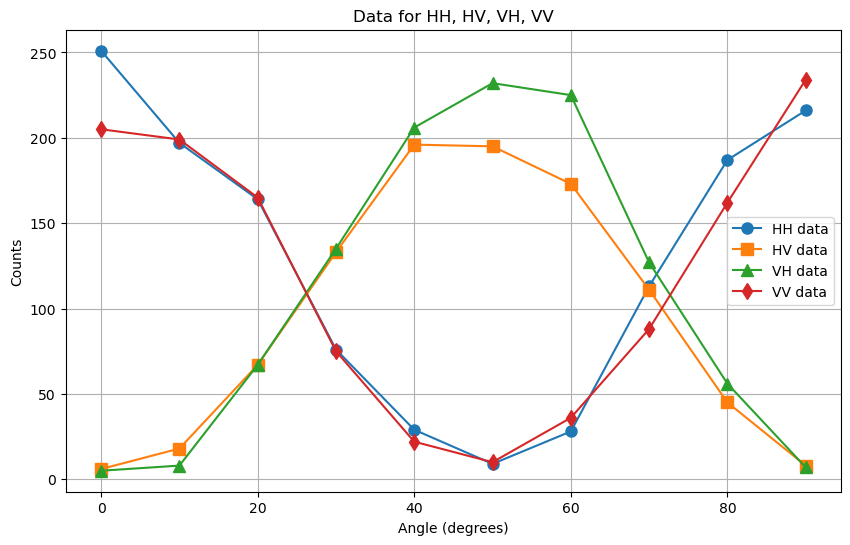

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Data for HH, HV, VH, VV
angles = np.arange(0, 100, 10)  # Step of 5 degrees
#angles_2 = np.arange(40, 100, 10)  # Step of 10 degrees
#angles = np.concatenate((angles_1, angles_2))  # Combine angles

# Counts for HH, HV, VH, VV
hh_counts = np.array([251, 197, 164, 76, 29, 9, 28, 113, 187, 216])
hv_counts = np.array([6, 18, 67, 133, 196, 195, 173, 111, 45, 8])
vh_counts = np.array([5, 8, 67, 135, 206, 232, 225, 127, 56, 7])
vv_counts = np.array([205, 199, 165, 75, 22, 10, 36, 88, 162, 234])

frequencies = calculate_frequencies(hh_counts, hv_counts, vh_counts, vv_counts)
V = calculate_v(frequencies)

print("Frequencies (HH, HV, VH, VV):")
print(frequencies)
print(f"Calculated V: {V:.4f}")


plt.figure(figsize=(10, 6))

# Plot HH, HV, VH, VV counts against angles
plt.plot(angles, hh_counts, 'o-', label='HH data', markersize=8)
plt.plot(angles, hv_counts, 's-', label='HV data', markersize=8)
plt.plot(angles, vh_counts, '^-', label='VH data', markersize=8)
plt.plot(angles, vv_counts, 'd-', label='VV data', markersize=8)

plt.xlabel("Angle (degrees)")
plt.ylabel("Counts")
plt.title("Data for HH, HV, VH, VV")
plt.legend()
plt.grid()
plt.show()

In [34]:
import numpy as np

angles = np.arange(0, 100, 10)

hh_counts = np.array([251, 197, 164,  76,  29,   9,  28, 113, 187, 216])
hv_counts = np.array([  6,  18,  67, 133, 196, 195, 173, 111,  45,   8])
vh_counts = np.array([  5,   8,  67, 135, 206, 232, 225, 127,  56,   7])
vv_counts = np.array([205, 199, 165,  75,  22,  10,  36,  88, 162, 234])

# 1) Compute total counts at each angle
total_counts = hh_counts + hv_counts + vh_counts + vv_counts

# 2) Compute relative frequencies f_{ij}
f_hh = hh_counts / total_counts
f_hv = hv_counts / total_counts
f_vh = vh_counts / total_counts
f_vv = vv_counts / total_counts

print("Relative frequencies f_{HH}:", f_hh)
print("Relative frequencies f_{HV}:", f_hv)
print("Relative frequencies f_{VH}:", f_vh)
print("Relative frequencies f_{VV}:", f_vv)

print()

K = f_hh - f_hv - f_vh + f_vv
print("K(theta):", K)

print()

K_max = np.max(K)
K_min = np.min(K)

# Visibility
V = (K_max - K_min) / (K_max + K_min)
print(f"Visibility = {V:.3f}")




Relative frequencies f_{HH}: [0.53747323 0.46682464 0.35421166 0.18138425 0.06401766 0.02017937
 0.06060606 0.25740319 0.41555556 0.46451613]
Relative frequencies f_{HV}: [0.01284797 0.04265403 0.14470842 0.31742243 0.43267108 0.43721973
 0.37445887 0.25284738 0.1        0.0172043 ]
Relative frequencies f_{VH}: [0.01070664 0.01895735 0.14470842 0.3221957  0.45474614 0.52017937
 0.48701299 0.28929385 0.12444444 0.01505376]
Relative frequencies f_{VV}: [0.43897216 0.47156398 0.35637149 0.17899761 0.04856512 0.02242152
 0.07792208 0.20045558 0.36       0.50322581]

K(theta): [ 0.95289079  0.87677725  0.42116631 -0.27923628 -0.77483444 -0.91479821
 -0.72294372 -0.08428246  0.55111111  0.93548387]

Visibility = 49.030


Fitted V: 0.966
Fitted phi: -0.265 rad


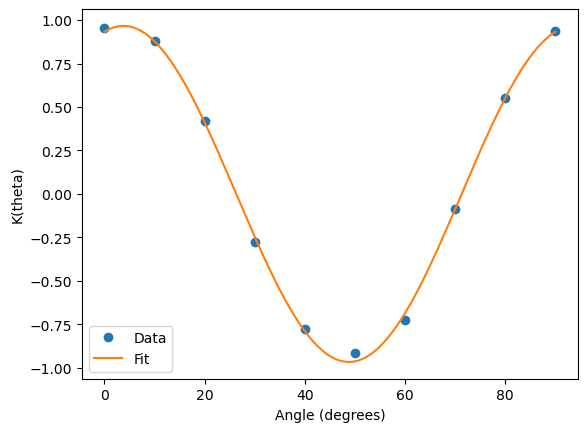

In [62]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def model(theta, V, phi):
    # Convert degrees -> radians if your angles are in degrees
    return V * np.cos(4 * np.radians(theta) + phi)

# Initial guesses for V and phi
initial_guess = [1.0, 0.0]

params, cov = curve_fit(model, angles, K, p0=initial_guess)
fitted_V, fitted_phi = params
print(f"Fitted V: {fitted_V:.3f}")
print(f"Fitted phi: {fitted_phi:.3f} rad")

# Plot data and the fit
theta_fine = np.linspace(0, 90, 200)  # or 0..100 if you like
K_fit = model(theta_fine, fitted_V, fitted_phi)

plt.figure()
plt.plot(angles, K, 'o', label='Data')
plt.plot(theta_fine, K_fit, '-', label='Fit')
plt.xlabel('Angle (degrees)')
plt.ylabel('K(theta)')
plt.legend()
plt.show()


For 22.5 

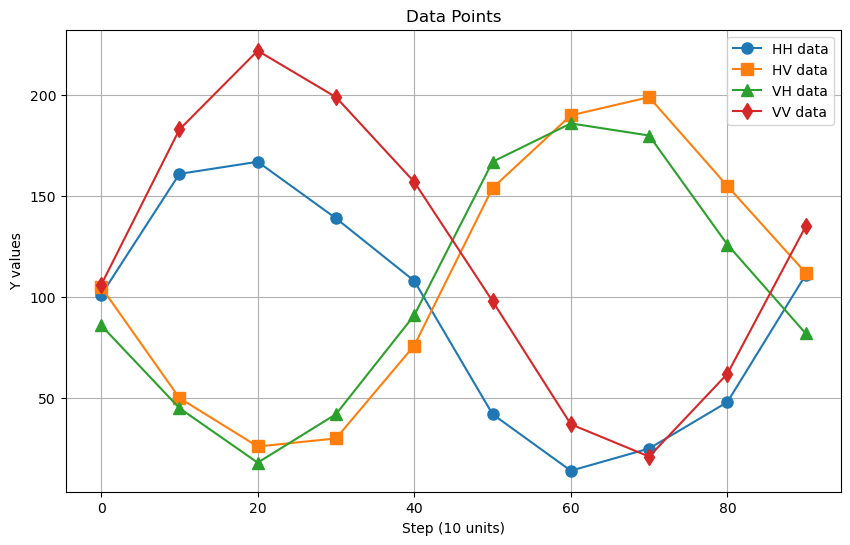

In [5]:
# Define the x data and y data for the four sets
x = np.arange(0, 100, 10)
HH = np.array([101, 161, 167, 139, 108, 42, 14, 25, 48, 111])
HV = np.array([105, 50, 26, 30, 76, 154, 190, 199, 155, 112])
VH = np.array([86, 45, 18, 42, 91, 167, 186, 180, 126, 82])
VV = np.array([106, 183, 222, 199, 157, 98, 37, 21, 62, 135])

# Plot the data without fitting
plt.figure(figsize=(10, 6))
plt.plot(x, HH, 'o-', label='HH data', markersize=8)
plt.plot(x, HV, 's-', label='HV data', markersize=8)
plt.plot(x, VH, '^-', label='VH data', markersize=8)
plt.plot(x, VV, 'd-', label='VV data', markersize=8)

plt.xlabel('Step (10 units)')
plt.ylabel('Y values')
plt.title('Data Points')
plt.legend()
plt.grid()
plt.show()

In [64]:
import numpy as np

angles = np.arange(0, 100, 10)
hh_counts = np.array([101, 161, 167, 139, 108, 42, 14, 25, 48, 111])
hv_counts = np.array([105, 50, 26, 30, 76, 154, 190, 199, 155, 112])
vh_counts = np.array([86, 45, 18, 42, 91, 167, 186, 180, 126, 82])
vv_counts = np.array([106, 183, 222, 199, 157, 98, 37, 21, 62, 135])

# 1) Compute total counts at each angle
total_counts = hh_counts + hv_counts + vh_counts + vv_counts

# 2) Compute relative frequencies f_{ij}
f_hh = hh_counts / total_counts
f_hv = hv_counts / total_counts
f_vh = vh_counts / total_counts
f_vv = vv_counts / total_counts

print("Relative frequencies f_{HH}:", f_hh)
print("Relative frequencies f_{HV}:", f_hv)
print("Relative frequencies f_{VH}:", f_vh)
print("Relative frequencies f_{VV}:", f_vv)

print()

K = f_hh - f_hv - f_vh + f_vv
print("K(theta):", K)

print()

K_max = np.max(K)
K_min = np.min(K)

# Visibility
V = (K_max - K_min) / (K_max + K_min)
print(f"Visibility = {V:.3f}")




Relative frequencies f_{HH}: [0.25376884 0.3667426  0.38568129 0.33902439 0.25       0.09110629
 0.03278689 0.05882353 0.12276215 0.25227273]
Relative frequencies f_{HV}: [0.2638191  0.11389522 0.06004619 0.07317073 0.17592593 0.3340564
 0.44496487 0.46823529 0.39641944 0.25454545]
Relative frequencies f_{VH}: [0.2160804  0.10250569 0.04157044 0.10243902 0.21064815 0.36225597
 0.43559719 0.42352941 0.32225064 0.18636364]
Relative frequencies f_{VV}: [0.26633166 0.41685649 0.51270208 0.48536585 0.36342593 0.21258134
 0.08665105 0.04941176 0.15856777 0.30681818]

K(theta): [ 0.04020101  0.56719818  0.79676674  0.64878049  0.22685185 -0.39262473
 -0.76112412 -0.78352941 -0.43734015  0.11818182]

Visibility = 119.382


Fitted V: 0.812
Fitted phi: -1.465 rad


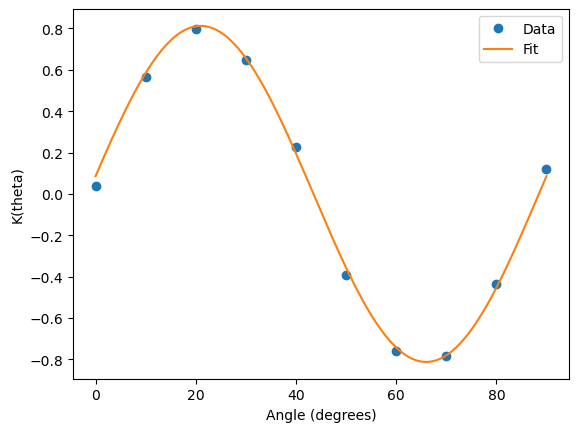

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def model(theta, V, phi):
    # Convert degrees -> radians if your angles are in degrees
    return V * np.cos(4 * np.radians(theta) + phi)

# Initial guesses for V and phi
initial_guess = [1.0, 0.0]

params, cov = curve_fit(model, angles, K, p0=initial_guess)
fitted_V, fitted_phi = params
print(f"Fitted V: {fitted_V:.3f}")
print(f"Fitted phi: {fitted_phi:.3f} rad")

# Plot data and the fit
theta_fine = np.linspace(0, 90, 200)  # or 0..100 if you like
K_fit = model(theta_fine, fitted_V, fitted_phi)

plt.figure()
plt.plot(angles, K, 'o', label='Data')
plt.plot(theta_fine, K_fit, '-', label='Fit')
plt.xlabel('Angle (degrees)')
plt.ylabel('K(theta)')
plt.legend()
plt.show()


BELL's Inequality

In [6]:
import numpy as np

# Data for each configuration
data = {
    "alpha_beta": [1026, 211, 111, 1230],
    "alpha_beta_prime": [906, 290, 220, 1001],
    "alpha_prime_beta": [779, 314, 333, 1013],
    "alpha_prime_beta_prime": [236, 964, 1010, 277],
}

# Poisson error for each count
def calculate_poisson_error(counts):
    return [np.sqrt(n) for n in counts]

# Error propagation for E
def calculate_E_and_error(counts):
    N_HH, N_HV, N_VH, N_VV = counts
    numerator = N_HH - N_HV - N_VH + N_VV
    denominator = N_HH + N_HV + N_VH + N_VV
    E = numerator / denominator
    
    # Partial derivatives
    dE_dN_HH = (N_HV + N_VH - N_VV) / (denominator ** 2)
    dE_dN_HV = (N_VH + N_VV - N_HH) / (denominator ** 2)
    dE_dN_VH = (N_HH + N_VV - N_HV) / (denominator ** 2)
    dE_dN_VV = (N_HH + N_HV - N_VH) / (denominator ** 2)
    
    # Errors
    errors = calculate_poisson_error(counts)
    sigma_E_squared = (
        (dE_dN_HH * errors[0]) ** 2 +
        (dE_dN_HV * errors[1]) ** 2 +
        (dE_dN_VH * errors[2]) ** 2 +
        (dE_dN_VV * errors[3]) ** 2
    )
    sigma_E = np.sqrt(sigma_E_squared)
    
    return E, sigma_E

# Calculate E and errors for each configuration
results = {}
errors = {}
for config, counts in data.items():
    E, sigma_E = calculate_E_and_error(counts)
    results[config] = E
    errors[config] = sigma_E

# Compute S value and its error
S = abs(results["alpha_beta"] + results["alpha_beta_prime"] + results["alpha_prime_beta"] - results["alpha_prime_beta_prime"])
sigma_S = np.sqrt(
    errors["alpha_beta"] ** 2 +
    errors["alpha_beta_prime"] ** 2 +
    errors["alpha_prime_beta"] ** 2 +
    errors["alpha_prime_beta_prime"] ** 2
)

# Prepare results
correlation_results = {config: (E, errors[config]) for config, E in results.items()}
S_result = (S, sigma_S)

correlation_results, S_result

({'alpha_beta': (0.7501939487975174, 0.00808952132021583),
  'alpha_beta_prime': (0.5779892428630534, 0.007213775995883215),
  'alpha_prime_beta': (0.4694546945469455, 0.006549219917202153),
  'alpha_prime_beta_prime': (-0.5874547647768396, 0.007157575531264087)},
 (2.385092650984356, 0.014546549017503605))

$\Phi^+$ 

In [21]:
import numpy as np

# Given count arrays for each measurement setting:
HH_counts = np.array([191, 97, 87, 73, 20, 92, 113, 99, 228])
HV_counts = np.array([15, 103, 121, 125, 195, 99, 101, 111, 6])
VH_counts = np.array([27, 133, 166, 137, 182, 143, 109, 125, 10])
VV_counts = np.array([198, 107, 96, 99, 24, 103, 100, 115, 218])

# The 9 measurement settings and their mapping to (i,j) indices:
# i,j correspond to {I=0, X=1, Y=2, Z=3}
# The given settings: XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ
# Map them:
measurement_settings = [
    ("X","X"), # XX -> (1,1)
    ("X","Y"), # XY -> (1,2)
    ("X","Z"), # XZ -> (1,3)
    ("Y","X"), # YX -> (2,1)
    ("Y","Y"), # YY -> (2,2)
    ("Y","Z"), # YZ -> (2,3)
    ("Z","X"), # ZX -> (3,1)
    ("Z","Y"), # ZY -> (3,2)
    ("Z","Z")  # ZZ -> (3,3)
]

# Define Pauli matrices
I = np.array([[1,0],[0,1]], dtype=complex)
X = np.array([[0,1],[1,0]], dtype=complex)
Y = np.array([[0,-1j],[1j,0]], dtype=complex)
Z = np.array([[1,0],[0,-1]], dtype=complex)

paulis = [I, X, Y, Z]

def expectation_value(C_HH, C_HV, C_VH, C_VV):
    """Compute the expectation value for a given measurement setting."""
    total = C_HH + C_HV + C_VH + C_VV
    if total == 0:
        return 0.0
    return (C_HH - C_HV - C_VH + C_VV) / total

# Initialize K matrix
K = np.zeros((4,4), dtype=complex)

# Set K_00 = 1 as a normalization assumption (since we don't have I⊗I measurement)
K[0,0] = 1.0

# Compute the other K_ij for i,j in {1,2,3} from the data
for idx, (m1, m2) in enumerate(measurement_settings):
    # Map basis to indices
    def basis_to_index(b):
        return {'I':0, 'X':1, 'Y':2, 'Z':3}[b]
    i = basis_to_index(m1)
    j = basis_to_index(m2)
    
    ev = expectation_value(HH_counts[idx], HV_counts[idx], VH_counts[idx], VV_counts[idx])
    K[i,j] = ev

for idx in range(1,4):
    K[0,idx] = 0.0
    K[idx,0] = 0.0

# Reconstruct the density matrix from K
rho = np.zeros((4,4), dtype=complex)
for i in range(4):
    for j in range(4):
        rho += (K[i,j]/4.0) * np.kron(paulis[i], paulis[j])

print("Reconstructed density matrix rho:")
print(rho.real)
print(rho.imag)
rho_real = rho.real


Reconstructed density matrix rho:
[[ 0.48268398  0.00177305 -0.05531915  0.39901957]
 [ 0.00177305  0.01731602  0.00353263  0.05531915]
 [-0.05531915  0.00353263  0.01731602 -0.00177305]
 [ 0.39901957  0.05531915 -0.00177305  0.48268398]]
[[ 0.          0.01222222  0.02688787  0.07002514]
 [-0.01222222  0.          0.0336615  -0.02688787]
 [-0.02688787 -0.0336615   0.         -0.01222222]
 [-0.07002514  0.02688787  0.01222222  0.        ]]


Fidelity

In [8]:
phi_plus_ideal = np.array([[0.5, 0, 0, 0.5],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0],
                           [0.5, 0, 0, 0.5]])

fidelity = np.real(np.trace(np.dot(phi_plus_ideal, rho_real)))

purity = np.real(np.trace(np.dot(rho_real, rho_real)))

fidelity, purity  

(0.8817035527056414, 0.7972789444956689)

Entenglement Detecting

In [9]:
# Define the identity matrix
identity_matrix = np.eye(4)

# Construct the witness operator W = (1/2) * I - |φ+⟩⟨φ+|
witness_operator = (1 / 2) * identity_matrix - phi_plus_ideal

dims = [[2, 2], [2, 2]]  # Specify the tensor product structure (e.g., two qubits)
rho_qutip = Qobj(rho_real, dims=dims)

mask = [0, 1]  # [0, 1] specifies no transpose for the first subsystem and transpose for the second
rho_pt = partial_transpose(rho_qutip, mask) # [0, 1] specifies subsystem indices

# Compute the eigenvalues of the partially transposed matrix
eigenvalues = rho_pt.eigenenergies()

witness_expectation = np.trace(np.dot(witness_operator, rho_real))

eigenvalues, witness_operator, witness_expectation

(array([-0.38544299,  0.38566578,  0.48995606,  0.50982116]),
 array([[ 0. ,  0. ,  0. , -0.5],
        [ 0. ,  0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0.5,  0. ],
        [-0.5,  0. ,  0. ,  0. ]]),
 -0.3817035527056414)

$\Phi^-$

In [22]:
HH_counts = np.array([34, 84, 118, 79, 108, 66, 82, 74, 135])
HV_counts = np.array([152, 94, 68, 91, 33, 74, 104, 107, 17])
VH_counts = np.array([154, 58, 63, 42, 17, 54, 38, 70, 5])
VV_counts = np.array([29, 144, 143, 149, 174, 129, 121, 122, 200])
# The 9 measurement settings and their mapping to (i,j) indices:
# i,j correspond to {I=0, X=1, Y=2, Z=3}
# The given settings: XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ
# Map them:
measurement_settings = [
    ("X","X"), # XX -> (1,1)
    ("X","Y"), # XY -> (1,2)
    ("X","Z"), # XZ -> (1,3)
    ("Y","X"), # YX -> (2,1)
    ("Y","Y"), # YY -> (2,2)
    ("Y","Z"), # YZ -> (2,3)
    ("Z","X"), # ZX -> (3,1)
    ("Z","Y"), # ZY -> (3,2)
    ("Z","Z")  # ZZ -> (3,3)
]

# Define Pauli matrices
I = np.array([[1,0],[0,1]], dtype=complex)
X = np.array([[0,1],[1,0]], dtype=complex)
Y = np.array([[0,-1j],[1j,0]], dtype=complex)
Z = np.array([[1,0],[0,-1]], dtype=complex)

paulis = [I, X, Y, Z]

def expectation_value(C_HH, C_HV, C_VH, C_VV):
    """Compute the expectation value for a given measurement setting."""
    total = C_HH + C_HV + C_VH + C_VV
    if total == 0:
        return 0.0
    return (C_HH - C_HV - C_VH + C_VV) / total

# Initialize K matrix
K = np.zeros((4,4), dtype=complex)

# Set K_00 = 1 as a normalization assumption (since we don't have I⊗I measurement)
K[0,0] = 1.0

# Compute the other K_ij for i,j in {1,2,3} from the data
for idx, (m1, m2) in enumerate(measurement_settings):
    # Map basis to indices
    def basis_to_index(b):
        return {'I':0, 'X':1, 'Y':2, 'Z':3}[b]
    i = basis_to_index(m1)
    j = basis_to_index(m2)
    
    ev = expectation_value(HH_counts[idx], HV_counts[idx], VH_counts[idx], VV_counts[idx])
    K[i,j] = ev

for idx in range(1,4):
    K[0,idx] = 0.0
    K[idx,0] = 0.0

# Reconstruct the density matrix from K
rho = np.zeros((4,4), dtype=complex)
for i in range(4):
    for j in range(4):
        rho += (K[i,j]/4.0) * np.kron(paulis[i], paulis[j])

print("Reconstructed density matrix rho:")
print(rho.real)
print(rho.imag)
rho_real2 = rho.real

Reconstructed density matrix rho:
[[ 0.46918768  0.0442029   0.08290816 -0.33933294]
 [ 0.0442029   0.03081232  0.01006465 -0.08290816]
 [ 0.08290816  0.01006465  0.03081232 -0.0442029 ]
 [-0.33933294 -0.08290816 -0.0442029   0.46918768]]
[[ 0.         -0.01273458 -0.05185759 -0.11578947]
 [ 0.01273458  0.         -0.01578947  0.05185759]
 [ 0.05185759  0.01578947  0.          0.01273458]
 [ 0.11578947 -0.05185759 -0.01273458  0.        ]]


Fidelity

In [11]:
phi_minus_ideal = np.array([[0.5, 0, 0, -0.5],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0],
                           [-0.5, 0, 0, 0.5]])

fidelity2 = np.real(np.trace(np.dot(phi_minus_ideal, rho_real2)))

purity2 = np.real(np.trace(np.dot(rho_real2, rho_real2)))

fidelity2, purity2 

(0.8085206165922143, 0.7079798714323802)

Entanglement

In [12]:
# Define the identity matrix
identity_matrix = np.eye(4)

# Construct the witness operator W = (1/2) * I - |φ-⟩⟨φ-|
witness_operator2 = (1 / 2) * identity_matrix - phi_minus_ideal

dims = [[2, 2], [2, 2]]  # Specify the tensor product structure (e.g., two qubits)
rho_qutip2 = Qobj(rho_real2, dims=dims)

mask = [0, 1]  # [0, 1] specifies no transpose for the first subsystem and transpose for the second
rho_pt2 = partial_transpose(rho_qutip2, mask) # [0, 1] specifies subsystem indices

# Compute the eigenvalues of the partially transposed matrix
eigenvalues2 = rho_pt2.eigenenergies()

witness_expectation2 = np.trace(np.dot(witness_operator2, rho_real2))

eigenvalues2, witness_operator2, witness_expectation2

(array([-0.32902096,  0.35780945,  0.47962337,  0.49158814]),
 array([[0. , 0. , 0. , 0.5],
        [0. , 0.5, 0. , 0. ],
        [0. , 0. , 0.5, 0. ],
        [0.5, 0. , 0. , 0. ]]),
 -0.3085206165922143)

$\Psi^+$

In [13]:
HH_counts = np.array([148, 86, 85, 66, 111, 64, 81, 76, 3])
HV_counts = np.array([16, 80, 86, 114, 24, 81, 87, 86, 167])
VH_counts = np.array([18, 64, 64, 75, 13, 47, 56, 60, 101])
VV_counts = np.array([205, 139, 141, 107, 197, 127, 126, 119, 15])

# The 9 measurement settings and their mapping to (i,j) indices:
# i,j correspond to {I=0, X=1, Y=2, Z=3}
# The given settings: XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ
# Map them:
measurement_settings = [
    ("X","X"), # XX -> (1,1)
    ("X","Y"), # XY -> (1,2)
    ("X","Z"), # XZ -> (1,3)
    ("Y","X"), # YX -> (2,1)
    ("Y","Y"), # YY -> (2,2)
    ("Y","Z"), # YZ -> (2,3)
    ("Z","X"), # ZX -> (3,1)
    ("Z","Y"), # ZY -> (3,2)
    ("Z","Z")  # ZZ -> (3,3)
]

# Define Pauli matrices
I = np.array([[1,0],[0,1]], dtype=complex)
X = np.array([[0,1],[1,0]], dtype=complex)
Y = np.array([[0,-1j],[1j,0]], dtype=complex)
Z = np.array([[1,0],[0,-1]], dtype=complex)

paulis = [I, X, Y, Z]

def expectation_value(C_HH, C_HV, C_VH, C_VV):
    """Compute the expectation value for a given measurement setting."""
    total = C_HH + C_HV + C_VH + C_VV
    if total == 0:
        return 0.0
    return (C_HH - C_HV - C_VH + C_VV) / total

# Initialize K matrix
K = np.zeros((4,4), dtype=complex)

# Set K_00 = 1 as a normalization assumption (since we don't have I⊗I measurement)
K[0,0] = 1.0

# Compute the other K_ij for i,j in {1,2,3} from the data
for idx, (m1, m2) in enumerate(measurement_settings):
    # Map basis to indices
    def basis_to_index(b):
        return {'I':0, 'X':1, 'Y':2, 'Z':3}[b]
    i = basis_to_index(m1)
    j = basis_to_index(m2)
    
    ev = expectation_value(HH_counts[idx], HV_counts[idx], VH_counts[idx], VV_counts[idx])
    K[i,j] = ev

for idx in range(1,4):
    K[0,idx] = 0.0
    K[idx,0] = 0.0

# Reconstruct the density matrix from K
rho = np.zeros((4,4), dtype=complex)
for i in range(4):
    for j in range(4):
        rho += (K[i,j]/4.0) * np.kron(paulis[i], paulis[j])

print("Reconstructed density matrix rho:")
print(rho.real)
rho_real3 = rho.real

Reconstructed density matrix rho:
[[ 0.03146853  0.04571429  0.05053191  0.00969554]
 [ 0.04571429  0.46853147  0.40244916 -0.05053191]
 [ 0.05053191  0.40244916  0.46853147 -0.04571429]
 [ 0.00969554 -0.05053191 -0.04571429  0.03146853]]


Fidelity

In [14]:
psi_plus_ideal = np.array([[0, 0, 0, 0],
                           [0, 0.5, 0.5, 0],
                           [0, 0.5, 0.5, 0],
                           [0, 0, 0, 0]])

fidelity3 = np.real(np.trace(np.dot(psi_plus_ideal, rho_real3)))

purity3 = np.real(np.trace(np.dot(rho_real3, rho_real3)))

fidelity3, purity3  

(0.87098063154686, 0.783715756927465)

Entanglement 

In [15]:
# Define the identity matrix
identity_matrix = np.eye(4)

# Construct the witness operator W = (1/2) * I - |ψ+⟩⟨ψ+|
witness_operator3 = (1 / 2) * identity_matrix - psi_plus_ideal

dims = [[2, 2], [2, 2]]  # Specify the tensor product structure (e.g., two qubits)
rho_qutip3 = Qobj(rho_real3, dims=dims)

mask = [0, 1]  # [0, 1] specifies no transpose for the first subsystem and transpose for the second
rho_pt3 = partial_transpose(rho_qutip3, mask) # [0, 1] specifies subsystem indices

# Compute the eigenvalues of the partially transposed matrix
eigenvalues3 = rho_pt3.eigenenergies()

witness_expectation3 = np.trace(np.dot(witness_operator3, rho_real3))

eigenvalues3, witness_operator3, witness_expectation3

(array([-0.38175221,  0.4330187 ,  0.45973492,  0.48899858]),
 array([[ 0.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. , -0.5,  0. ],
        [ 0. , -0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0.5]]),
 -0.37098063154686006)

$\Psi^-$

In [16]:
HH_counts = np.array([30, 51, 29, 77, 17, 32, 82, 74, 17])
HV_counts = np.array([176, 123, 173, 95, 175, 135, 68, 101, 198])
VH_counts = np.array([163, 84, 112, 55, 121, 87, 37, 44, 129])
VV_counts = np.array([30, 78, 46, 139, 21, 90, 160, 106, 31])
# The 9 measurement settings and their mapping to (i,j) indices:
# i,j correspond to {I=0, X=1, Y=2, Z=3}
# The given settings: XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ
# Map them:
measurement_settings = [
    ("X","X"), # XX -> (1,1)
    ("X","Y"), # XY -> (1,2)
    ("X","Z"), # XZ -> (1,3)
    ("Y","X"), # YX -> (2,1)
    ("Y","Y"), # YY -> (2,2)
    ("Y","Z"), # YZ -> (2,3)
    ("Z","X"), # ZX -> (3,1)
    ("Z","Y"), # ZY -> (3,2)
    ("Z","Z")  # ZZ -> (3,3)
]

# Define Pauli matrices
I = np.array([[1,0],[0,1]], dtype=complex)
X = np.array([[0,1],[1,0]], dtype=complex)
Y = np.array([[0,-1j],[1j,0]], dtype=complex)
Z = np.array([[1,0],[0,-1]], dtype=complex)

paulis = [I, X, Y, Z]

def expectation_value(C_HH, C_HV, C_VH, C_VV):
    """Compute the expectation value for a given measurement setting."""
    total = C_HH + C_HV + C_VH + C_VV
    if total == 0:
        return 0.0
    return (C_HH - C_HV - C_VH + C_VV) / total

# Initialize K matrix
K = np.zeros((4,4), dtype=complex)

# Set K_00 = 1 as a normalization assumption (since we don't have I⊗I measurement)
K[0,0] = 1.0

# Compute the other K_ij for i,j in {1,2,3} from the data
for idx, (m1, m2) in enumerate(measurement_settings):
    # Map basis to indices
    def basis_to_index(b):
        return {'I':0, 'X':1, 'Y':2, 'Z':3}[b]
    i = basis_to_index(m1)
    j = basis_to_index(m2)
    
    ev = expectation_value(HH_counts[idx], HV_counts[idx], VH_counts[idx], VV_counts[idx])
    K[i,j] = ev

for idx in range(1,4):
    K[0,idx] = 0.0
    K[idx,0] = 0.0

# Reconstruct the density matrix from K
rho = np.zeros((4,4), dtype=complex)
for i in range(4):
    for j in range(4):
        rho += (K[i,j]/4.0) * np.kron(paulis[i], paulis[j])

print("Reconstructed density matrix rho:")
print(rho.real)
rho_real4 = rho.real

Reconstructed density matrix rho:
[[ 0.064       0.09870317 -0.14583333  0.01830174]
 [ 0.09870317  0.436      -0.3679258   0.14583333]
 [-0.14583333 -0.3679258   0.436      -0.09870317]
 [ 0.01830174  0.14583333 -0.09870317  0.064     ]]


Fidelity

In [17]:
psi_minus_ideal = np.array([[0, 0, 0, 0],
                           [0, 0.5, -0.5, 0],
                           [0, -0.5, 0.5, 0],
                           [0, 0, 0, 0]])

fidelity4 = np.real(np.trace(np.dot(psi_minus_ideal, rho_real4)))

purity4 = np.real(np.trace(np.dot(rho_real4, rho_real4)))

fidelity4, purity4  

(0.8039258025302778, 0.7838314074227745)

Entanglement

In [18]:
# Define the identity matrix
identity_matrix = np.eye(4)

# Construct the witness operator W = (1/2) * I - |ψ-⟩⟨ψ-|
witness_operator4 = (1 / 2) * identity_matrix - psi_minus_ideal

dims = [[2, 2], [2, 2]]  # Specify the tensor product structure (e.g., two qubits)
rho_qutip4 = Qobj(rho_real4, dims=dims)

mask = [0, 1]  # [0, 1] specifies no transpose for the first subsystem and transpose for the second
rho_pt4 = partial_transpose(rho_qutip4, mask) # [0, 1] specifies subsystem indices

# Compute the eigenvalues of the partially transposed matrix
eigenvalues4 = rho_pt4.eigenenergies()

witness_expectation4 = np.trace(np.dot(witness_operator4, rho_real4))

eigenvalues4, witness_operator4, witness_expectation4

(array([-0.37898465,  0.39467388,  0.49155366,  0.49275711]),
 array([[0.5, 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. ],
        [0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0.5]]),
 -0.3039258025302778)